## Exercício Referente à Aula 13 - Otimização com Restrições

## Abaixo estão as resoluções pelo método gráfico e pelo Método Simplex.

# No excel e no pdf, estão os outros item (resolução por software) e no pdf ou papel escaneado está o equacionamento (item a).

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import pandas as pd
%matplotlib inline

# Método Gráfico:

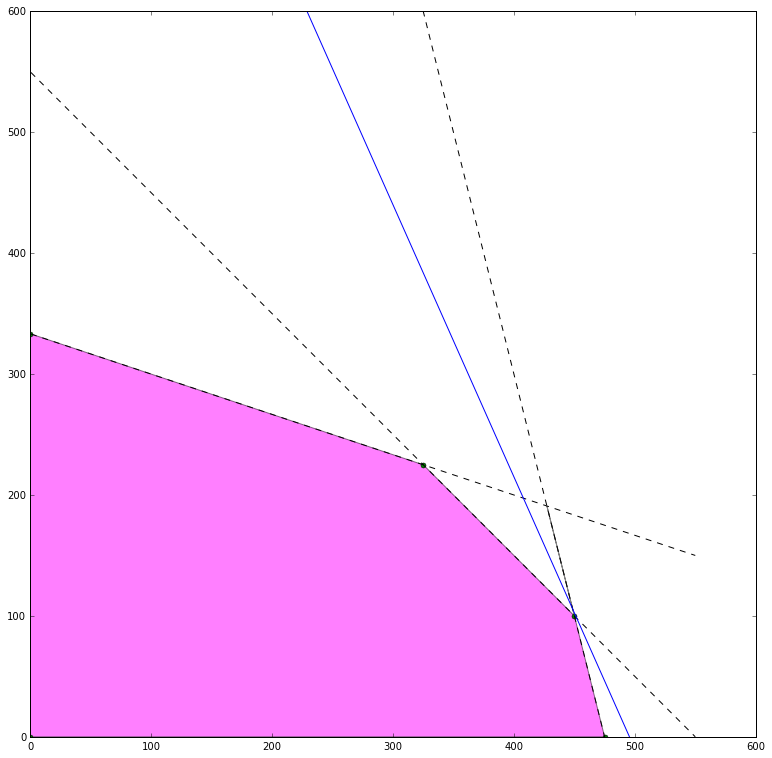

In [2]:
def f1(x):
    return 550 - x
def f2(x):
    return (40 - 0.04*x)/0.12
def f3(x):
    return (9500 - 20*x)/5
def f4(x):
    return 0
def lucro(x):
    return (22300-45*x)/20


x = Symbol('x')
x1, =  solve(f1(x)-f2(x))
x2, =  solve(f1(x)-f3(x))
x3, =  solve(f2(x)-f3(x))
x4, =  solve(f3(x)-f4(x))
x5 = 0
x6 = 0

y1 = f1(x1)
y2 = f1(x2)
y3 = f2(x3)
y4 = f3(x4)
y5 = 0
y6 = 333.333

plt.figure(figsize=(13,13))

plt.plot(x1,f1(x1),'go',markersize=5)
plt.plot(x2,f1(x2),'go',markersize=5)
#plt.plot(x3,f2(x3),'go',markersize=5)
plt.plot(x4,f4(x4),'go',markersize=5)
plt.plot(x5,y5,'go',markersize=5)
plt.plot(x6,y6,'go',markersize=5)

plt.fill([x1,x2,x3,x4,x5,x6,x1],[y1,y2,y3,y4,y5,y6,y1],'magenta',alpha=0.5)

xr = np.linspace(0.5,550,100)
y1r = f1(xr)
y2r = f2(xr)
y3r = f3(xr)
ylucror = lucro(xr)

plt.plot(xr,y1r,'k--')
plt.plot(xr,y2r,'k--')
plt.plot(xr,y3r,'k--')
plt.plot(xr,ylucror)

plt.xlim(0,600)
plt.ylim(0,600)

plt.show()

# O lucro é, neste gráfico, representado pela linha cheia azul. Desta forma, variou-se o valor do lucro até encontrarmos a intersecção representada no gráfico com o ponto ótimo. Assim, pelo método gráfico, é possível concluir que o lucro máximo é de 22300.

# Método Simplex:

# Tableau:

In [8]:
index = ["Z", "S1", "S2", "S3"]
column_titles = ['Z','A','B','S1','S2','S3', 'Solução']
table_values = [[1,-45,-20,0,0,0,0],[0,1,1,1,0,0,550],[0,0.04,0.12,0,1,0,40],[0,20,5,0,0,1,9500]]

def table(index, table_values, column_titles):
    table = pd.DataFrame(table_values)
    table.index = [i for i in index]
    table.columns = [i for i in column_titles]
    return table

tableau = table(index, table_values, column_titles)
tableau

,Z,A,B,S1,S2,S3,Solução
Z,1,-45.00,-20.00,0,0,0,0
S1,0,1.00,1.00,1,0,0,550
S2,0,0.04,0.12,0,1,0,40
S3,0,20.00,5.00,0,0,1,9500


In [21]:
matrix = np.array([[1,-45,-20,0,0,0,0],[0,1,1,1,0,0,550],[0,0.04,0.12,0,1,0,40],[0,20,5,0,0,1,9500]])
matrix = matrix.astype('float64')

# TRANSFORMANDO ESSA MATRIZ EM MATRIZ IDENTIDADE POR GAUSS JORDAN, É POSSIVEL DETERMINAR S1, S2 e S3 e depois, por fim, A e B.

In [22]:
#código para pivotar a matriz inteira
for i in range(1,4):
    for j in range(3):
        if i > j:
            if matrix[i][j] != 0:
                temp = matrix[i][j]/matrix[j][j]
                for k in range(4):
                    matrix[i][k] -= temp*matrix[j][k]

In [23]:
matrix = np.transpose(matrix)

In [25]:
#código para pivotar a matriz inteira
for i in range(1,4):
    for j in range(3):
        if i > j:
            if matrix[i][j] != 0:
                temp = matrix[i][j]/matrix[j][j]
                for k in range(4):
                    matrix[i][k] -= temp*matrix[j][k]

In [26]:
print(matrix)

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   8.00000000e-02   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -2.75000000e+01]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   5.50000000e+02   4.00000000e+01   9.50000000e+03]]


In [28]:
matrix = np.transpose(matrix)

In [29]:
print(matrix)

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   8.00000000e-02   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -2.75000000e+01]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   5.50000000e+02   4.00000000e+01   9.50000000e+03]]


# Não deu tempo, mas a partir dessa matriz você obtém os valores.

# Análise

# Pelo gráfico, podemos ver que a reta que mais influencia no lucro é a que possui a inclinação intermediária entre as três retas tracejadas. Desta forma, aumentando o coeficiente linear desta reta, aquele ponto ótimo será deslocado para a direita aumentando o lucro.

# Esta reta corresponde à restrição da quantidade de matéria prima disponível. Assim, o que aumentará mais o lucro é aumentar a quantidade de matéria prima.